In [17]:
import pandas as pd

# Archive
data = pd.read_csv("regression_data.csv")
data2 = pd.read_csv("rainfall.csv")
data.head()

data2.head()

new1 = [None]*len(data)
new2 = [None]*len(data)
new3 = [None]*len(data)

for i in range(0, len(data)):
    for j in range(0, len(data2)):
        if data['latitude_kb'][i] == data2['latitude'][j] and data['longitude_kb'][i] == data2['longitude'][j]:
            new1[i] = data2['nilai_hujan_max'][j]
            new2[i] = data2['tempoh_hujan'][j]
            new3[i] = data2['tempoh_ulang'][j]

df = pd.DataFrame({'nilai_hujan_max': new1, 'tempoh_hujan': new2, 'tempoh_ulang': new3})

df['kedalaman_banjir'] = data['kedalaman_banjir']
df['distance'] = data['distance']

df.head()
df.to_csv('flood_risk.csv', index=False)

In [18]:
df = pd.read_csv('flood_risk.csv')
df.head()

,nilai_hujan_max,tempoh_hujan,tempoh_ulang,kedalaman_banjir,distance
0,111.0,2.0,34,0.6,4245.737601
1,18.0,1.0,2,0.2,4532.533863
2,18.0,1.0,2,0.2,5266.664356
3,111.0,2.0,34,0.6,8652.136771
4,18.0,1.0,2,0.2,3753.265280


In [19]:
df['numeric_checker'] = df['tempoh_ulang'].str.isnumeric()
df.head()

,nilai_hujan_max,tempoh_hujan,tempoh_ulang,kedalaman_banjir,distance,numeric_checker
0,111.0,2.0,34,0.6,4245.737601,True
1,18.0,1.0,2,0.2,4532.533863,True
2,18.0,1.0,2,0.2,5266.664356,True
3,111.0,2.0,34,0.6,8652.136771,True
4,18.0,1.0,2,0.2,3753.265280,True


In [20]:
for i in range(0, len(df)):
    if df['numeric_checker'][i] == True:
        pass
    else:
        df['tempoh_ulang'][i] = 2

C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_14768\680445758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempoh_ulang'][i] = 2
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_14768\680445758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempoh_ulang'][i] = 2
C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_14768\680445758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempoh_ulang'][i] = 

In [21]:
df['tempoh_hujan'] = df['tempoh_hujan'].astype('int64')
df['tempoh_ulang'] = df['tempoh_ulang'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19824 entries, 0 to 19823
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nilai_hujan_max   19824 non-null  float64
 1   tempoh_hujan      19824 non-null  int64  
 2   tempoh_ulang      19824 non-null  int64  
 3   kedalaman_banjir  19824 non-null  float64
 4   distance          19824 non-null  float64
 5   numeric_checker   19824 non-null  bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 793.9 KB


In [23]:
df.describe()

,nilai_hujan_max,tempoh_hujan,tempoh_ulang,kedalaman_banjir,distance
count,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000
mean,101.770031,10.655014,24.961511,0.574154,4071.710091
std,75.885400,22.746204,101.408058,0.535538,4790.504712
min,0.000000,0.000000,2.000000,-5.000000,19.253343
25%,55.000000,2.000000,2.000000,0.300000,1313.426109
50%,82.000000,3.000000,2.000000,0.450000,2683.402344
75%,117.000000,6.000000,12.000000,0.600000,4827.023973
max,570.000000,288.000000,1135.000000,6.000000,66853.687820


In [24]:
df2 = pd.read_csv('regression_data.csv')
df['town_distance'] = df2['town_distance']

# Calculate the flood hazard
Reference: Development of flood risk vulnerability index for critical infrastructure in malaysai

- Low 0 - 0.5
- Moderate 0.5 - 1.2
- High: 1.2 - 2.5 (due to nature of our data, we will assume > 1.2 as high )

In [25]:
# if for a point the distance from historical flood site is > 2km, we will set the kedalaman banjir to 0
new = [None]*len(df)

for i in range(0, len(df)):
    if (df['distance'][i] > 2000 or df['distance'][i] <= 3000):
        new[i] = df['kedalaman_banjir'][i]*0.5
    elif (df['distance'][i] > 3000):
        new[i] = 0
    else:
        new[i] = df['kedalaman_banjir'][i]
df['kedalaman_banjir'] = new

In [26]:
new = [None]*len(df)

for i in range(0, len(df)):
    if (df['kedalaman_banjir'][i] >= 0 and df['kedalaman_banjir'][i] < 0.5):
        new[i] =  "Low"
    elif (df['kedalaman_banjir'][i] >= 0.5 and df['kedalaman_banjir'][i] < 1.2):
        new[i] =  "Medium"
    else:
        new[i] =  "High"

In [27]:
df.loc[:,'flood_hazard'] = new
print(df.head())
print(df.tail())

   nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir     distance  \
0            111.0             2            34               0.3  4245.737601   
1             18.0             1             2               0.1  4532.533863   
2             18.0             1             2               0.1  5266.664356   
3            111.0             2            34               0.3  8652.136771   
4             18.0             1             2               0.1  3753.265280   

   numeric_checker  town_distance flood_hazard  
0             True   11394.621769          Low  
1             True    8220.642421          Low  
2             True    9033.156201          Low  
3             True   18796.430267          Low  
4             True    6279.729808          Low  
       nilai_hujan_max  tempoh_hujan  tempoh_ulang  kedalaman_banjir  \
19819             68.5             3             2             0.075   
19820             68.5             3             2             0.075   
198

In [28]:
df['flood_hazard'].value_counts()

flood_hazard
Low       16735
Medium     2697
High        392
Name: count, dtype: int64

In [29]:
df.describe()

,nilai_hujan_max,tempoh_hujan,tempoh_ulang,kedalaman_banjir,distance,town_distance
count,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000
mean,101.770031,10.655014,24.961511,0.287077,4071.710091,16447.459433
std,75.885400,22.746204,101.408058,0.267769,4790.504712,18087.364621
min,0.000000,0.000000,2.000000,-2.500000,19.253343,181.210220
25%,55.000000,2.000000,2.000000,0.150000,1313.426109,5802.998856
50%,82.000000,3.000000,2.000000,0.225000,2683.402344,10951.282859
75%,117.000000,6.000000,12.000000,0.300000,4827.023973,18798.056593
max,570.000000,288.000000,1135.000000,3.000000,66853.687820,133517.266498


<Axes: xlabel='flood_hazard', ylabel='count'>

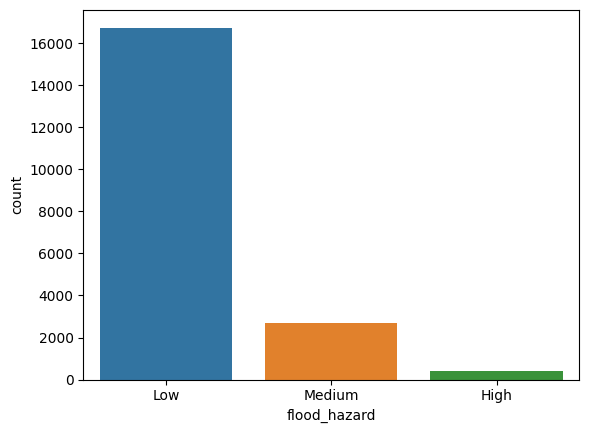

In [30]:
import seaborn as sns
sns.countplot(x='flood_hazard', data=df)

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


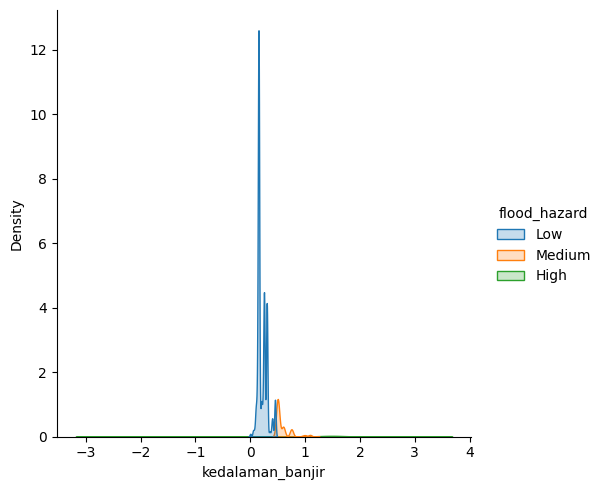

In [31]:
sns.displot(df, x="kedalaman_banjir", hue="flood_hazard", kind="kde", fill=True)

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


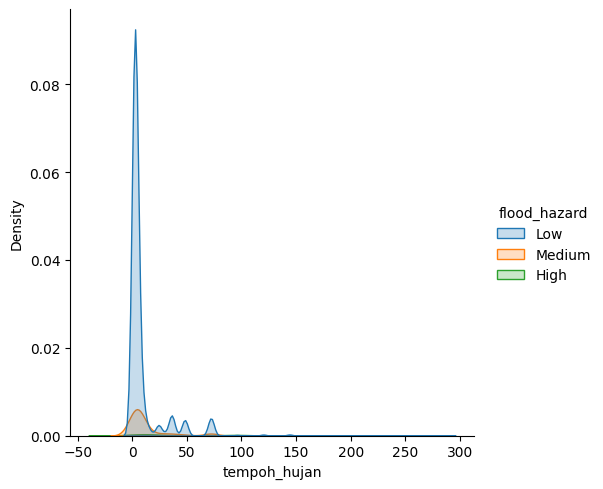

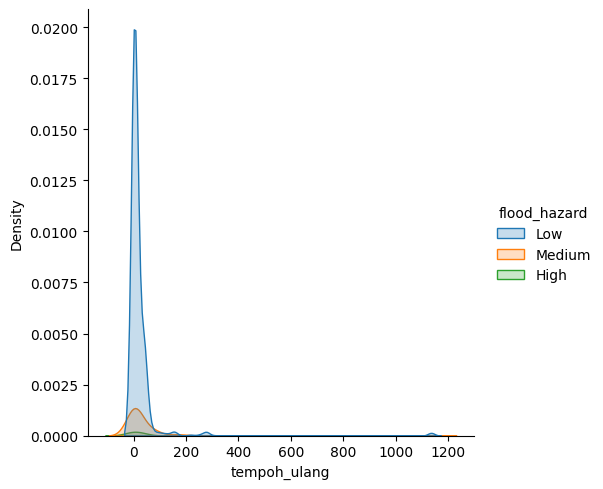

In [32]:
sns.displot(df, x="tempoh_hujan", hue="flood_hazard", kind="kde", fill=True)
sns.displot(df, x="tempoh_ulang", hue="flood_hazard", kind="kde", fill=True)

# Damage Computation
- We do not know the location whether it is in a city or not in a city
- Land coverage only let us know the land use, but not specifically how the land is used (housing, industrial, institutional)
- We will assume all the location to be the same under the class of residential household

Using the data from Condition of Flooding and Flood Damage Assessment, JPS (2012) for residential household, 
- mean damange = 3274
- mean stata value = 0.25 (urban = 1 and rural = 0)
- mean depth = 0.93
- mean duration = 2.83

Total damage factor = 0.32 * (depth - mean_depth) +
                0.08 * (duration - mean_duration) +
                0.33 * (strata - mean_strata) +
                1

In [35]:
# get the strata
# we will assume that the strata to be 1 if the town distance is less than the town distance column mean (about 10 km)
new = [None]*len(df)

for i in range(0, len(df)):
    if (df['town_distance'][i] < df['town_distance'].mean()):
        new[i] = 1
    else:
        new[i] = 0

df['strata'] = new
df.head()

,nilai_hujan_max,tempoh_hujan,tempoh_ulang,kedalaman_banjir,distance,numeric_checker,town_distance,flood_hazard,strata
0,111.0,2,34,0.3,4245.737601,True,11394.621769,Low,1
1,18.0,1,2,0.1,4532.533863,True,8220.642421,Low,1
2,18.0,1,2,0.1,5266.664356,True,9033.156201,Low,1
3,111.0,2,34,0.3,8652.136771,True,18796.430267,Low,0
4,18.0,1,2,0.1,3753.265280,True,6279.729808,Low,1


In [34]:
# Computing the damage

